In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tf.__version__


'2.15.0'

In [3]:
 (X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(type(X_train))
print(X_train.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)


In [5]:
np.ndim(X_train)

3

In [6]:
print(type(X_test))
print(X_test.shape)

<class 'numpy.ndarray'>
(10000, 28, 28)


In [7]:
print(type(y_train))
print(y_train.shape)

<class 'numpy.ndarray'>
(60000,)


In [8]:
print(type(y_test))
print(y_test.shape)

<class 'numpy.ndarray'>
(10000,)


In [9]:
np.ndim(y_train)

1

In [10]:
X_train[6].shape

(28, 28)

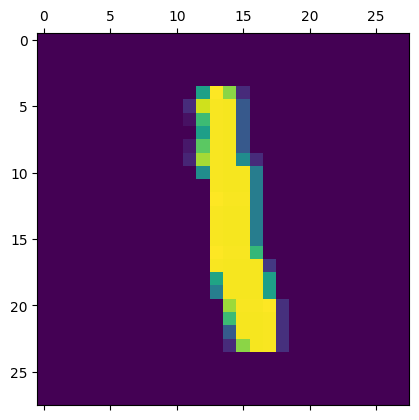

In [11]:
plt.matshow(X_train[6])

In [12]:
X_train_flat=X_train.reshape(len(X_train),28*28)

In [13]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(28*28,),activation="sigmoid")])
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics = ["accuracy"])
model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 9.9817 - accuracy: 0.8393
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 6.0903 - accuracy: 0.8770
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 5.6144 - accuracy: 0.8835
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4607 - accuracy: 0.8852
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.3267 - accuracy: 0.8856


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(28*28,),activation="sigmoid"),
                        keras.layers.Dense(20,activation="sigmoid"),
                        keras.layers.Dense(20,activation="sigmoid"),
                        keras.layers.Dense(10,activation="sigmoid")])
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics = ["accuracy"])
model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5399 - accuracy: 0.4999
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9315 - accuracy: 0.6736
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8634 - accuracy: 0.7177
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8017 - accuracy: 0.7426
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7795 - accuracy: 0.7538


In [18]:
model2=keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(10,input_shape=(28*28,),activation="sigmoid")])
model2.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics = ["accuracy"])
model2.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.9718 - accuracy: 0.8402
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 6.1689 - accuracy: 0.8778
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.6755 - accuracy: 0.8839
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4807 - accuracy: 0.8862
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4654 - accuracy: 0.8860


In [19]:
model3=keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(10,input_shape=(28*28,),activation="softmax")])
model3.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics = ["accuracy"])
model3.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 9.6434 - accuracy: 0.8402
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 6.2740 - accuracy: 0.8763
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.8672 - accuracy: 0.8812
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4975 - accuracy: 0.8859
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 5.3107 - accuracy: 0.8857


In [21]:
y=np.array([1,0,1,0,0])
yhat=np.array([0.8,0.2,0.9,0.1,0.2])

In [22]:
def mae(yt,tp):
  total_error=0
  for i,j in zip(yt,tp):
    total_error=total_error+abs(i-j)


  mae=total_error/len(yt)
  print("Total Error",total_error)
  print("MAE:",mae)

In [23]:
mae(y,yhat)

Total Error 0.8
MAE: 0.16


In [24]:
np.mean(np.abs(np.abs(y-yhat)))

0.16

In [25]:
def mse(yt,tp):
  total_error=0
  for i,j in zip(yt,tp):
    total_error=total_error+(i-j)**2


  mse=total_error/len(yt)
  print("Total Error",total_error)
  print("MAE:",mse)

In [29]:
mse(y,yhat)

Total Error 0.13999999999999999
MAE: 0.027999999999999997


In [30]:
np.mean((y-yhat)**2)

0.027999999999999997

In [31]:
def log_loss(yt,yp):
  return -np.mean(yt*np.log(yp)+(1-yt)*np.log(1-yp))

In [32]:
log_loss(y,yhat)

0.17603033705165635

In [43]:
def log_loss(yt,yp):
  e=1e-10
  print("**",yp)
  yt_new=[max(i,e)for i in yp]
  print("***",yp_new)
  yp_new=[min(i,1-e)for i in yp_new]
  print("****",yp_new)
  yp_new=np.array(yp_new)
  return -np.mean(yt*np.log(yp_new)+(1-yt)*np.log(1-yp_new))

In [44]:
log_loss(y,yhat)

** [0.8 0.2 0.9 0.1 0.2]


UnboundLocalError: local variable 'yp_new' referenced before assignment